<a href="https://colab.research.google.com/github/DebadityaShome/Reinforcement-Learning-implementations/blob/main/SARSA_(Gym_Cartpole).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!apt update
# install required system dependencies
!apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*
!pip install pyvirtualdisplay

In [2]:
import pyvirtualdisplay

d = pyvirtualdisplay.Display()
d.start() # Start Xvfb and set "DISPLAY" environment properly.

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [3]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt

d = Display()
d.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1005'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1005'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

## SARSA algorithm

Initialize alpha (learning rate)

Initialize Q(s, a)

Initalize S

Choose A(S) using epsilon greedy from Q

Loop:

    * Take action A, get reward S'
    * Choose A'(S') using epsilon greedy from Q
    * Q(s, a) -> Q(s, a) + alpha(R + gamma*Q(s', a') - Q(s, a))
    * S -> S', A -> A'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [5]:
def maxAction(Q, state):
    values = np.array([Q[state, a] for a in range(2)])
    action = np.argmax(values)
    return action

In [6]:
poleThetaSpace = np.linspace(-0.20943951, 0.20943951, 10)
poleThetaVelSpace = np.linspace(-4, 4, 10)
cartPosSpace = np.linspace(-2.4, 2.4, 10)
cartVelSpace = np.linspace(-4, 4, 10)

In [7]:
def getState(observation):
    cartX, cartXdot, cartTheta, cartThetadot = observation
    cartX = int(np.digitize(cartX, cartPosSpace))
    cartXdot = int(np.digitize(cartXdot, cartVelSpace))
    cartTheta = int(np.digitize(cartTheta, poleThetaSpace))
    cartThetadot = int(np.digitize(cartThetadot, poleThetaVelSpace))
    
    return (cartX, cartXdot, cartTheta, cartThetadot)

In [8]:
env = gym.make('CartPole-v0')

ALPHA = 0.1
GAMMA = 0.9
EPS = 1.0

states = []
for i in range(len(cartPosSpace)+1):
    for j in range(len(cartVelSpace)+1):
        for k in range(len(poleThetaSpace)+1):
            for l in range(len(poleThetaVelSpace)+1):
                states.append((i, j, k, l))

In [9]:
Q = {}
for s in states:
    for a in range(2):
        Q[s, a] = 0

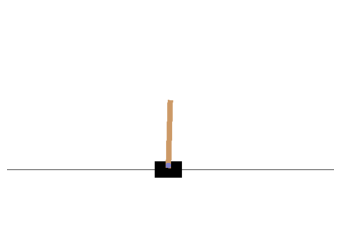

In [ ]:
numGames = 500
totalRewards = np.zeros(numGames)

for i in range(numGames):
    if i % 5000 == 0:
        print('Starting game', i)
    observation = env.reset()
    img = plt.imshow(env.render('rgb_array'))
    s = getState(observation)
    rand = np.random.random()
    a = maxAction(Q, s) if rand < (1 - EPS) else env.action_space.sample()
    done = False
    epRewards = 0
    while not done:
        observation_, reward, done, info = env.step(a)
        display.clear_output(wait=True)
        img.set_data(env.render('rgb_array'))
        plt.axis('off')
        display.display(plt.gcf())
        s_ = getState(observation_)
        rand = np.random.random()
        a_ = maxAction(Q, s_) if rand < (1 - EPS) else env.action_space.sample()
        epRewards += reward
        Q[s, a] = Q[s, a] + ALPHA*(reward + GAMMA*Q[s_, a_] - Q[s, a])
        s, a = s_, a_
    env.reset()
    EPS -= 2/(numGames) if EPS > 0 else 0
    totalRewards[i] = epRewards

In [ ]:
plt.plot(totalRewards, 'b--')
plt.show()